# 분류 (Classification)

- 입력 데이터를 미리 정의된 여러 클래스 중 하나로 예측하는 것 (범주형 데이터)
    - 이진 분류: 양성(1), 음성(0) 중에 하나를 맞추는 것
    - 다중 분류: 여러 클래스 중 하나를 맞추는 것

## Logistic Regression
- 선형 회귀 방식으로 분류 문제를 해결하는 모델
    - 이진 분류: 이진 분류를 위한 로지스틱 함수(시그모이드)를 통해 확률값을 계산하고 0 또는 1로 분류
    - 다중 분류: 다중 분류를 위한 소프트맥스 함수를 통해 각 클래스별 확률값을 계산해 다중 분류

**하이퍼 파라미터**

<table>
  <thead>
    <tr>
      <th>하이퍼파라미터</th>
      <th>설명</th>
      <th>기본값</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td><code>penalty</code></td>
      <td>정규화의 종류 지정 / <code>'l1'</code>, <code>'l2'</code>, <code>'elasticnet'</code>, <code>'none'</code> 중 선택</td>
      <td><code>'l2'</code></td>
    </tr>
    <tr>
      <td><code>C</code></td>
      <td>정규화의 강도를 제어 / 값이 작을수록 강한 정규화 적용 (<code>1 / λ</code>로 해석 가능)</td>
      <td><code>1.0</code></td>
    </tr>
    <tr>
      <td><code>solver</code></td>
      <td>최적화 알고리즘 선택 / <code>'newton-cg'</code>, <code>'lbfgs'</code>, <code>'liblinear'</code>, <code>'sag'</code>, <code>'saga'</code> 중 선택</td>
      <td><code>'lbfgs'</code></td>
    </tr>
    <tr>
      <td><code>max_iter</code></td>
      <td>최적화를 위한 최대 반복 횟수</td>
      <td><code>100</code></td>
    </tr>
    <tr>
      <td><code>multi_class</code></td>
      <td>다중 클래스 문제에서 사용할 전략 / <code>'auto'</code>, <code>'ovr'</code> (one-vs-rest), <code>'multinomial'</code> 중 선택</td>
      <td><code>'auto'</code></td>
    </tr>
    <tr>
      <td><code>fit_intercept</code></td>
      <td>절편을 학습할지 여부 / <code>True</code> 또는 <code>False</code></td>
      <td><code>True</code></td>
    </tr>
  </tbody>
</table>

**solver**

<table>
  <thead>
    <tr>
      <th>Solver</th>
      <th>설명</th>
      <th>특징</th>
      <th>추천 사용 상황</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td><strong>liblinear</strong></td>
      <td>선형 분류를 위한 라이브러리인 "LIBLINEAR"에서 유래, 작은 데이터셋이나 희소 데이터셋에 적합한 이중 좌표축 감소법(Dual Coordinate Descent Algorithm) 사용</td>
      <td>빠르고 메모리 효율적이며, L1 및 L2 정규화 모두를 지원</td>
      <td>작은 크기의 데이터셋, 희소한 피처를 가진 데이터셋</td>
    </tr>
    <tr>
      <td><strong>newton-cg</strong></td>
      <td>Newton Conjugate Gradient 뉴턴법을 사용한 최적화 알고리즘, 큰 데이터셋에서도 효율적으로 동작</td>
      <td>L2 정규화를 지원하며, 대규모 데이터셋에 적합</td>
      <td>중대형 크기의 데이터셋</td>
    </tr>
    <tr>
      <td><strong>lbfgs</strong></td>
      <td>Broyden-Fletcher-Goldfarb-Shanno(BFGS) 알고리즘의 변형인 L-BFGS(Limited-memory Broyden–Fletcher–Goldfarb–Shanno) 알고리즘을 사용</td>
      <td>L2 정규화를 지원하며, 메모리를 절약하면서도 효율적인 성능을 발휘</td>
      <td>대규모 데이터셋, 다중 클래스 분류</td>
    </tr>
    <tr>
      <td><strong>sag</strong></td>
      <td>Stochastic Average Gradient 하강법으로, 점진적으로 평균 그래디언트를 사용하여 최적화</td>
      <td>매우 큰 데이터셋에서 효율적이며, L2 정규화를 지원</td>
      <td>매우 큰 크기의 데이터셋</td>
    </tr>
    <tr>
      <td><strong>saga</strong></td>
      <td>Stochastic Average Gradient Augmented / sag의 확장판으로, L1 및 L2 정규화 모두를 지원</td>
      <td>희소 데이터셋에도 적합하며, 매우 큰 데이터셋에서 효율적</td>
      <td>매우 큰 크기의 데이터셋, 희소한 피처를 가진 데이터셋</td>
    </tr>
  </tbody>
</table>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 이진 분류를 위한 Sigmoid 함수
- 선형회귀식을 통해 도출한 예측값(z)을 0과 1 사이의 수로 변환해주는 활성화 함수 (Activation Function)

$$
sigmoid(z) = \frac{1}{1+e^{-z}}
$$
  
$$
h_\theta(x) = \frac{1}{1 + e^{-\theta^T x}}
$$

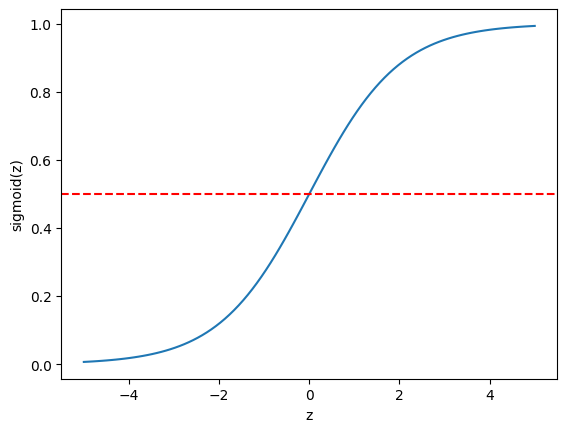

In [5]:
# sigmoid 시각화
z = np.linspace(-5,5,100) # -5~5까지 100개 균등한 간격
sigmoid_value = 1 / (1 + np.exp(-z))

plt.plot(z, sigmoid_value)
plt.axhline(y=0.5, color='red', linestyle='--') 
plt.xlabel('z')
plt.ylabel('sigmoid(z)')
plt.show()

In [6]:
fish_df = pd.read_csv('./data/fish.csv')
#fish_df['Species'].value_counts()

is_bream_or_smelt = (fish_df['Species']=='Bream') | (fish_df['Species']=='Smelt')
fish_df = fish_df[is_bream_or_smelt]
fish_df['Species'].value_counts()

Species
Bream    35
Smelt    14
Name: count, dtype: int64

In [7]:
display(fish_df.describe())
display(fish_df.info())

,Weight,Length,Diagonal,Height,Width
count,49.000000,49.000000,49.000000,49.000000,49.000000
mean,444.500000,27.055102,31.120408,11.476400,4.259751
std,328.143233,10.242804,12.097296,6.150976,1.967686
min,6.700000,9.800000,10.800000,1.728400,1.047600
25%,19.700000,14.300000,15.200000,2.872800,1.879200
50%,500.000000,31.000000,36.200000,14.179500,5.072800
75%,700.000000,34.500000,39.700000,15.633000,5.589000
max,1000.000000,41.000000,46.500000,18.957000,6.749700


<class 'pandas.core.frame.DataFrame'>
Index: 49 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   49 non-null     object 
 1   Weight    49 non-null     float64
 2   Length    49 non-null     float64
 3   Diagonal  49 non-null     float64
 4   Height    49 non-null     float64
 5   Width     49 non-null     float64
dtypes: float64(5), object(1)
memory usage: 2.7+ KB


None

In [8]:
# 데이터 분리 및 정규와 (X-y 분리 / 훈련-평가 데이터 분리 / 정규화)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = fish_df.drop('Species', axis=1)
y = fish_df['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

In [9]:
# 모델 학습 및 평가
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(X_scaled_train, y_train)

lr_clf.score(X_scaled_train, y_train), lr_clf.score(X_scaled_test, y_test) 

(1.0, 1.0)

In [10]:
y_pred = lr_clf.predict(X_scaled_test[:3])
print(y_pred, '\n')
print(lr_clf.classes_)                          #분류 카테고리
print(lr_clf.predict_proba(X_scaled_test[:3]))  # 클래스별 확률

['Bream' 'Smelt' 'Smelt'] 

['Bream' 'Smelt']
[[0.98159822 0.01840178]
 [0.04990096 0.95009904]
 [0.09298277 0.90701723]]


#### 동작 직접 간단 구현

In [11]:
# w1x1 + w2x2 + w3x3 + w4x4 + w5x5 + b

print(lr_clf.coef_)
print(lr_clf.intercept_)

# 새로운 X -> 선형회귀값 계산
#z = np.dot(X_scaled_test[:3], lr_clf.coef_[0]) + lr_clf.intercept_ # 직접 계산한 것
z = lr_clf.decision_function(X_scaled_test[:3]) # 위에 한 것 편하게 하기
# 시그모이드 함수 적용 -> 결과값
sigmoid_value = 1/(1+np.exp(-z))
print(sigmoid_value)
# 결과값 -> 최종 분류 결과
result = ['Smelt'if value >= 0.5 else 'Bream' for value in sigmoid_value]
print(result)

[[-0.57717269 -0.79233938 -0.82533982 -0.86579233 -0.82205625]]
[-2.38186126]
[0.01840178 0.95009904 0.90701723]
['Bream', 'Smelt', 'Smelt']


### 다중 분류를 위한 Softmax 

In [12]:
# 데이터셋 생성
from sklearn.datasets import make_classification # sklearn 에서 제공하는 가상 데이터셋 제공해주는 함수

# 이런식으로 반환해줌
X, y = make_classification(
    n_samples= 100,
    n_features= 4,  
    n_informative= 3,   # 3개를 유의미한 feature로 하겠다  
    n_redundant= 0,     # 중복 특성 개수
    n_classes= 3,
    random_state= 42
)

In [13]:
# 데이터 분리 
X_train, X_test, y_train, y_test = \
train_test_split(X,y, random_state=42)

In [14]:
# 모델 학습 및 평가
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)

lr_clf.score(X_train, y_train), lr_clf.score(X_test,y_test)

(0.7066666666666667, 0.44)

In [15]:
# 예측 (분류)
print(lr_clf.predict(X_test[:5]))

[1 0 0 1 2]


In [16]:
lr_clf.predict_proba(X_test[:5])

array([[0.22917118, 0.39960169, 0.37122713],
       [0.83550691, 0.16166581, 0.00282727],
       [0.573597  , 0.32484717, 0.10155583],
       [0.20188375, 0.64427073, 0.15384551],
       [0.02755811, 0.07287149, 0.8995704 ]])

In [17]:
print(lr_clf.coef_) # 클래스 3개라 coef도 3가지가 나옴 (row 개수)
print()
print(lr_clf.intercept_) # 결과 => [0번 클래스 절편, 1번 클래스 절편, 2번 클래스 절편] => 왜 3개? 클래스가 3개라서 y값이 3개가 나오므로

[[ 0.89441441  0.61903765 -0.35254926 -0.16837743]
 [ 0.10632026  0.03401018  0.43335793  0.09398105]
 [-1.00073467 -0.65304782 -0.08080867  0.07439638]]

[ 0.29927161  0.3716549  -0.67092651]


In [18]:
z = lr_clf.decision_function(X_test[:5]) 

# softmax function 직접 만들기
def softmax(z):
    exp_z = np.exp(z)
   
    # np.sum은 기본적으로 차원축소시킴 -> 그래서 keepdims 파라미터 True로 바꿈
    sum_exp_z = np.sum(exp_z, axis=1, keepdims=True) 
    #sum_exp_z = np.sum(exp_z, axis=1).reshape(-1,1) # 위랑 똑같음
    
    return exp_z / sum_exp_z

softmax_value = softmax(z)

print(softmax_value, '\n') # .predict_proba(X_test[:5])랑 결과 똑같이 나옴

print(np.argmax(softmax_value, axis=1))

[[0.22917118 0.39960169 0.37122713]
 [0.83550691 0.16166581 0.00282727]
 [0.573597   0.32484717 0.10155583]
 [0.20188375 0.64427073 0.15384551]
 [0.02755811 0.07287149 0.8995704 ]] 

[1 0 0 1 2]


##  Logistic Regression 연습: 다중 생선 분류

In [19]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [20]:
# 데이터 로드
fish_df = pd.read_csv('./data/fish.csv')
display(fish_df.head(2))
display(fish_df.info())

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.52,4.0200
1,Bream,290.0,26.3,31.2,12.48,4.3056


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length    159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Height    159 non-null    float64
 5   Width     159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB


None

In [21]:
# 데이터 분리 및 정규화
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 분리
X = fish_df.drop('Species', axis= 1)
y = fish_df['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# 정규화
std_scaler = StandardScaler()
X_train_scaled =std_scaler.fit_transform(X_train)
X_test_scaled = std_scaler.transform(X_test)


In [22]:
# 모델 훈련 및 평가
lr_clf = LogisticRegression()
lr_clf.fit(X_train_scaled, y_train)

lr_clf.score(X_train_scaled, y_train), lr_clf.score(X_test_scaled,y_test)

(0.8067226890756303, 0.85)

In [23]:
# 예측
lr_clf.predict(X_test_scaled[:5])

array(['Perch', 'Smelt', 'Pike', 'Perch', 'Perch'], dtype=object)

In [24]:
# 모델이 학습한 클래스 출력해보기 -> 알파벳순으로 출력함
lr_clf.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [25]:
# 테스트 데이터 5개에 대한 예측 확률 출력해보기
predict_prob = lr_clf.predict_proba(X_test_scaled[:5])
print(predict_prob)

print('\n')
print(np.argmax(predict_prob, axis=1))

[[4.09258166e-03 9.14963240e-02 5.44996127e-01 8.08441468e-03
  2.80496746e-01 6.11374435e-02 9.69636363e-03]
 [2.38768197e-04 6.14759159e-02 1.26503179e-01 2.09669058e-03
  8.69296309e-02 7.21909373e-01 8.46442652e-04]
 [9.31417295e-03 8.97045866e-03 2.23289703e-01 5.69130702e-01
  1.69678810e-01 6.31583256e-03 1.33003205e-02]
 [6.09086533e-02 7.71114588e-02 5.26503923e-01 3.56050755e-02
  2.56678732e-01 2.96709654e-03 4.02250605e-02]
 [4.20329168e-03 2.95499860e-02 6.63907569e-01 2.59621240e-02
  2.44584026e-01 1.83957105e-02 1.33972930e-02]]


[2 5 3 2 2]


In [26]:
# 모델의 가중치와 절편을 가져와 z값 직접 계산하기 (decision_function 사용X)
# w1x1 + w2x2 + w3x3 + w4x4 + w5x5 + b
z1 = np.dot(lr_clf.coef_[0], X_test_scaled[0]) + lr_clf.intercept_[0]
z2 = np.dot(lr_clf.coef_[1], X_test_scaled[0]) + lr_clf.intercept_[1]
z3 = np.dot(lr_clf.coef_[2], X_test_scaled[0]) + lr_clf.intercept_[2]
z4 = np.dot(lr_clf.coef_[3], X_test_scaled[0]) + lr_clf.intercept_[3]
z5 = np.dot(lr_clf.coef_[4], X_test_scaled[0]) + lr_clf.intercept_[4]
z6 = np.dot(lr_clf.coef_[5], X_test_scaled[0]) + lr_clf.intercept_[5]
z7 = np.dot(lr_clf.coef_[6], X_test_scaled[0]) + lr_clf.intercept_[6]
print("Z:", z1, z2, z3, z4, z5, z6, z7)

# softmax 함수 적용하기 (위에서 만든 softmax() 함수 활용)
Z = np.array([[z1, z2, z3, z4, z5, z6, z7]])
# Z = lr_clf.decision_function(X_test_scaled[:1])
P = softmax(Z)
print("P:", P)

# 확률값이 가장 높은 클래스로 예측 결과 출력하기
label = lr_clf.classes_[np.argmax(P, axis=1)]
print("label:", label)

Z: -2.353342461290558 0.7537803507202023 2.5382602426869703 -1.6725803505731105 1.874043676938647 0.35060605549425894 -1.490767513976421
P: [[0.00409258 0.09149632 0.54499613 0.00808441 0.28049675 0.06113744
  0.00969636]]
label: ['Perch']
